Notebook Summary:
This notebook covers key concepts related to Linear Regression and Gradient Descent using Python. The primary objective is to predict housing prices using both custom and built-in regression methods. The dataset used is the California Housing Dataset, with the goal of predicting the median house value (MedHouseVal) based on features such as median income, house age, number of rooms, and population.

Key steps:

Gradient Descent for Linear Regression:

Implemented from scratch using sample data to optimize the intercept (b0) and slope (b1).
The gradient descent algorithm iteratively reduces the cost function to find the best-fit line for the data.
Multiple Linear Regression using scikit-learn:

Utilized the California Housing Dataset to predict median house values.
Features include variables like Median Income, House Age, and Average Rooms.
Applied Linear Regression to model the relationship between these features and housing prices.
Evaluated model performance using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²).
Data Exploration:

Visualized relationships between key variables using pair plots and a correlation matrix to understand feature correlations.
Selected high-correlation features to refine the model for better accuracy.
Feature Selection:

Focused on features with high correlation to the target variable (MedHouseVal) to simplify the model and improve interpretability.

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

Iteration 0: b0 = 0.0425, b1 = 0.1275, Cost = 10.8750
Iteration 100: b0 = 0.4454, b1 = 1.5483, Cost = 0.0541
Iteration 200: b0 = 0.3835, b1 = 1.5696, Cost = 0.0498
Iteration 300: b0 = 0.3301, b1 = 1.5877, Cost = 0.0466
Iteration 400: b0 = 0.2842, b1 = 1.6033, Cost = 0.0443
Iteration 500: b0 = 0.2447, b1 = 1.6168, Cost = 0.0425
Iteration 600: b0 = 0.2106, b1 = 1.6284, Cost = 0.0412
Iteration 700: b0 = 0.1813, b1 = 1.6383, Cost = 0.0403
Iteration 800: b0 = 0.1561, b1 = 1.6469, Cost = 0.0395
Iteration 900: b0 = 0.1344, b1 = 1.6543, Cost = 0.0390

Final coefficients: b0 = 0.1159, b1 = 1.6606


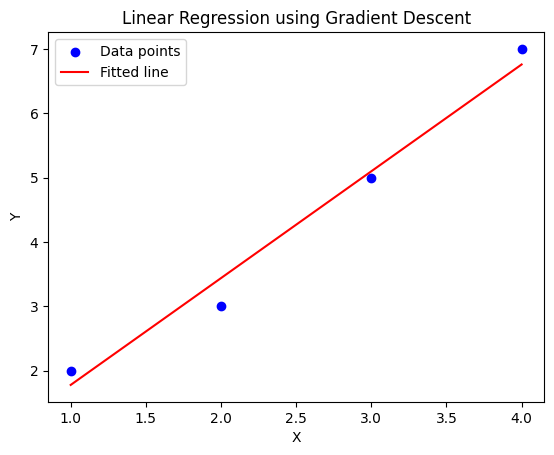

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (X and Y)
X = np.array([1, 2, 3, 4])
Y = np.array([2, 3, 5, 7])

# Initialize parameters
b0 = 0  # Intercept
b1 = 0  # Slope
learning_rate = 0.01  # Step size
iterations = 1000  # Number of iterations

# Number of samples
n = len(X)

# Gradient Descent function
def gradient_descent(X, Y, b0, b1, learning_rate, iterations):
    for i in range(iterations):
        # Predicted Y values (b0 + b1*X) using Linear Regression
        Y_pred = b0 + b1 * X

        # Compute gradients
        db0 = (1/n) * sum(Y_pred - Y)  # Partial derivative wrt b0
        db1 = (1/n) * sum((Y_pred - Y) * X)  # Partial derivative wrt b1

        # Update b0 and b1
        b0 -= learning_rate * db0
        b1 -= learning_rate * db1

        # Print values after every 100 iterations for insight
        if i % 100 == 0:
            cost = (1/(2*n)) * sum((Y_pred - Y)**2)
            print(f"Iteration {i}: b0 = {b0:.4f}, b1 = {b1:.4f}, Cost = {cost:.4f}")

    return b0, b1

# Run Gradient Descent
b0, b1 = gradient_descent(X, Y, b0, b1, learning_rate, iterations)

print(f"\nFinal coefficients: b0 = {b0:.4f}, b1 = {b1:.4f}")

# Plotting the result
plt.scatter(X, Y, color="blue", label="Data points")
plt.plot(X, b0 + b1 * X, color="red", label="Fitted line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression using Gradient Descent")
plt.show()

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For data loading and splitting
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# For model training and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For scaling features
from sklearn.preprocessing import StandardScaler

Explanation of Data

MedInc: Median income in block group.
HouseAge: Median house age in block group.
AveRooms: Average number of rooms per household.
AveBedrms: Average number of bedrooms per household.
Population: Block group population.
AveOccup: Average number of household members.
Latitude & Longitude: Geographic coordinates.
MedHouseVal: Median house value (target variable).

In [6]:
# Load the California Housing dataset
california = fetch_california_housing()

# Create a DataFrame
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

# Display the first five rows
print(data.head(10))
data.count()

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.4

,0
MedInc,20640
HouseAge,20640
AveRooms,20640
AveBedrms,20640
Population,20640
AveOccup,20640
Latitude,20640
Longitude,20640
MedHouseVal,20640


In [7]:
# Check for missing values
print(data.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [8]:
# Statistical summary
print(data.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

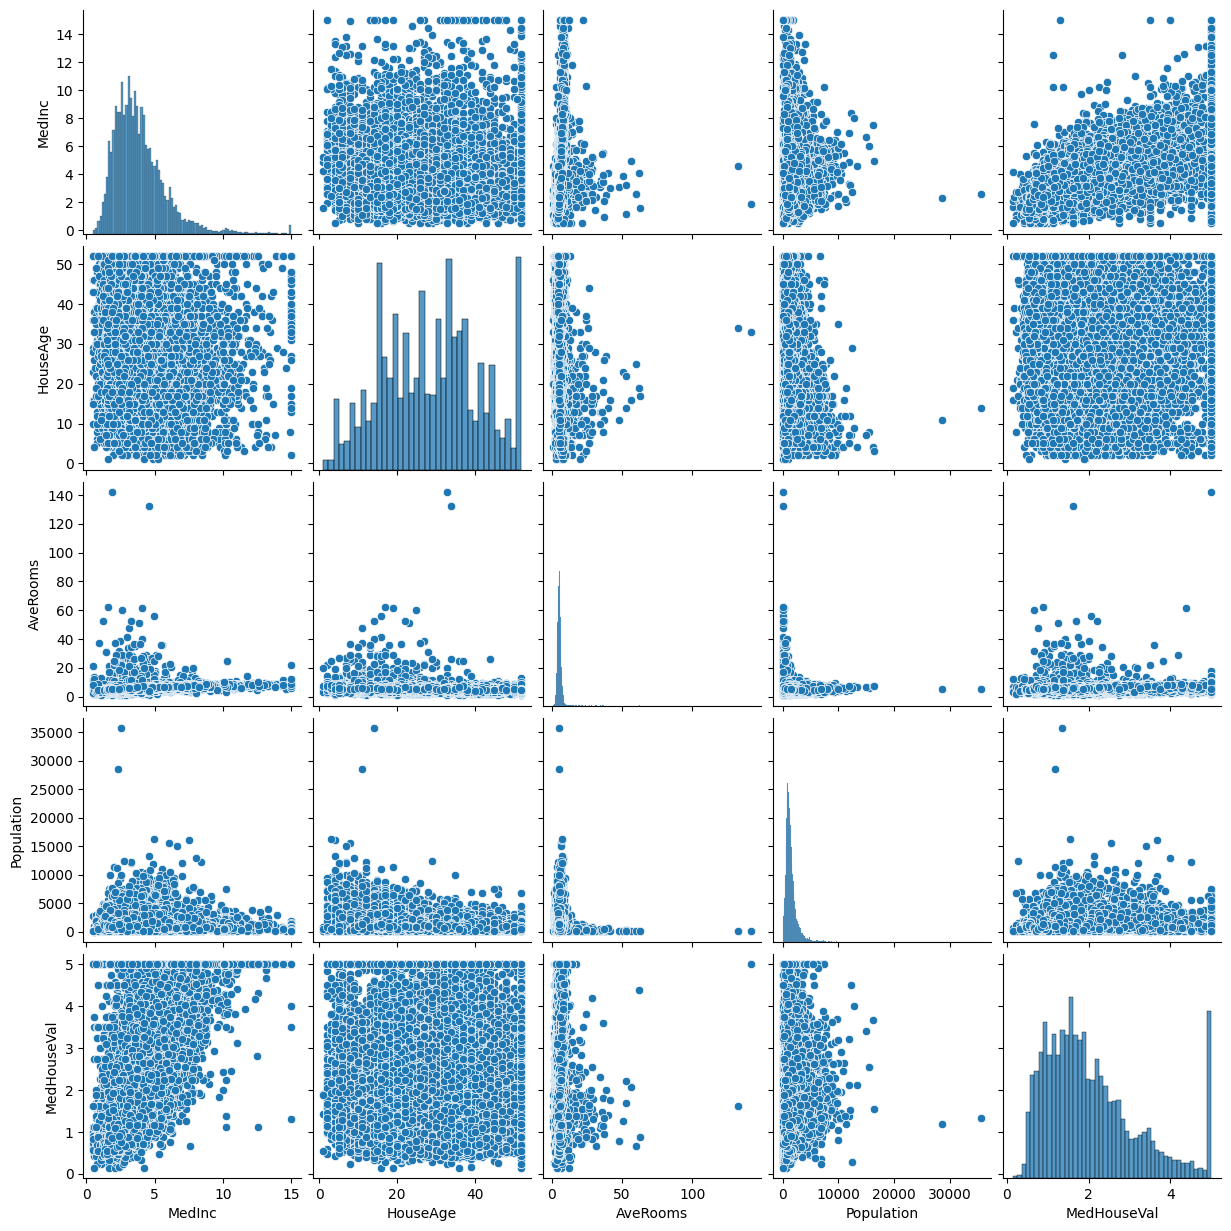

In [9]:
#Visualizing Feature Relationships
# Pairplot for selected features
sns.pairplot(data[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'MedHouseVal']])
plt.show()


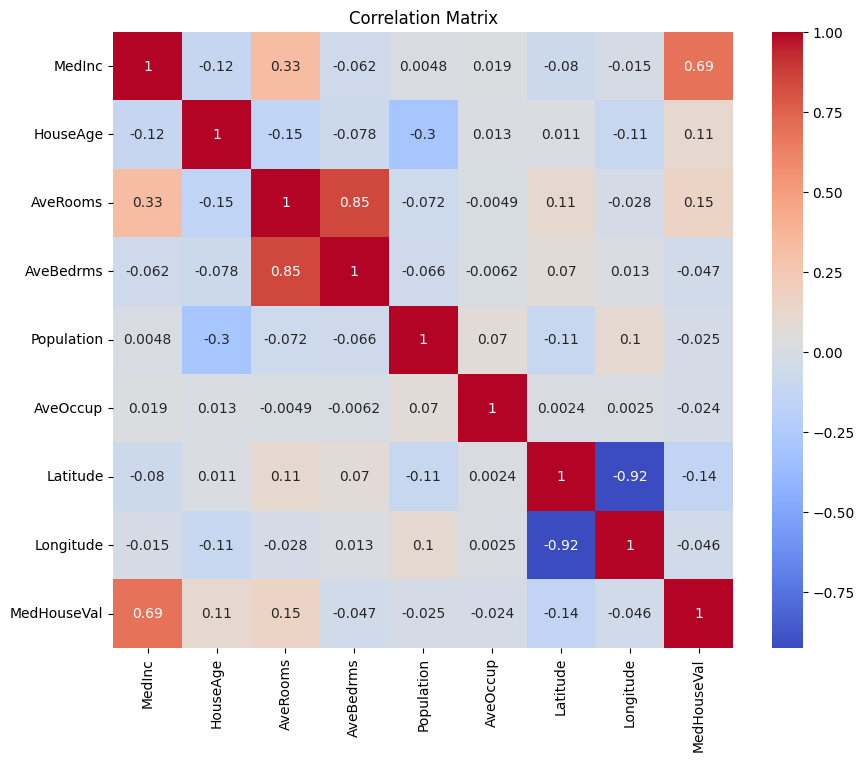

In [10]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
#Step 4: Splitting the Dataset
# Features and target variable
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

# Splitting the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (16512, 8)
Testing set size: (4128, 8)


In [12]:
#Step 5: Training the Linear Regression Model
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Coefficients
print("Intercept (b0):", round(lr_model.intercept_,3))
print("Coefficients (b1, b2, ..., b8):",np.round_(lr_model.coef_,4))

Intercept (b0): -37.023
Coefficients (b1, b2, ..., b8): [ 0.4487  0.0097 -0.1233  0.7831 -0.     -0.0035 -0.4198 -0.4337]


Step 5: Evaluating the Model
Mean Squared Error (MSE): Average of the squares of the errors.
Root Mean Squared Error (RMSE): Square root of MSE.
Mean Absolute Error (MAE): Average of absolute errors.
R-squared (R²): Proportion of variance explained by the model.

In [14]:
# Predictions on the test set
y_pred = lr_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== scikit-learn Linear Regression Evaluation ===")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

=== scikit-learn Linear Regression Evaluation ===
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
Mean Absolute Error (MAE): 0.5332
R-squared (R²): 0.5758
=== scikit-learn Linear Regression Evaluation ===
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
Mean Absolute Error (MAE): 0.5332
R-squared (R²): 0.5758


In [15]:
# Dummy data for prediction (same feature structure as X)
dummy_data = pd.DataFrame({
    'MedInc': [5.0, 8.0, 3.0],
    'HouseAge': [30, 10, 40],
    'AveRooms': [6.0, 5.0, 4.0],
    'AveBedrms': [1.0, 1.5, 1.0],
    'Population': [1000, 500, 2000],
    'AveOccup': [3.0, 2.5, 4.0],
    'Latitude': [34.0, 36.0, 38.0],
    'Longitude': [-120.0, -121.0, -122.0]
})

# Predictions
dummy_predictions = lr_model.predict(dummy_data)

print("=== Predictions on Dummy Data using scikit-learn Linear Regression ===")
for i, pred in enumerate(dummy_predictions, 1):
    print(f"Dummy Data {i}: Predicted MedHouseVal = {pred:.4f}")

=== Predictions on Dummy Data using scikit-learn Linear Regression ===
Dummy Data 1: Predicted MedHouseVal = 3.3144
Dummy Data 2: Predicted MedHouseVal = 4.5778
Dummy Data 3: Predicted MedHouseVal = 1.9437


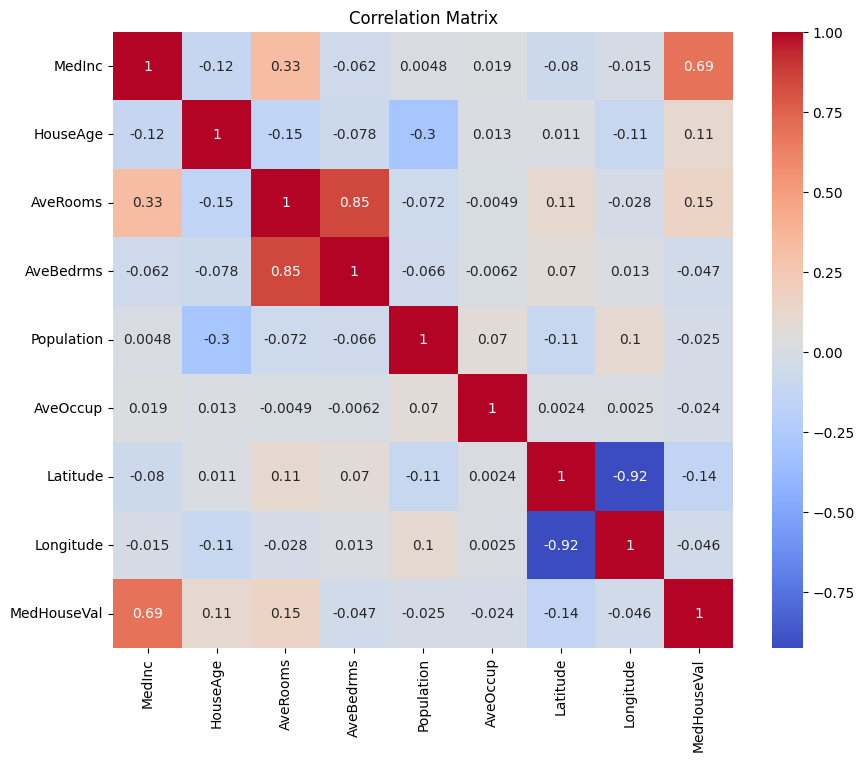

In [16]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Display the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
#We'll select features whose absolute correlation with MedHouseVal is greater than or equal to 0.5.
# Get absolute correlations with the target variable
corr_target = abs(corr_matrix['MedHouseVal'])

# Select features with correlation >= 0.05
high_corr_features = corr_target[corr_target >= 0.15].index.tolist()

# Remove the target variable from the list
high_corr_features.remove('MedHouseVal')

print("Features with high correlation (|correlation| >= 0.5) with MedHouseVal:")
print(high_corr_features)

Features with high correlation (|correlation| >= 0.5) with MedHouseVal:
['MedInc', 'AveRooms']


In [18]:
# Define the feature matrix X and target vector y using high correlation features
X = data[high_corr_features]
y = data['MedHouseVal']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (16512, 2)
Testing set size: (4128, 2)


In [19]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the scaled training data
lr_model.fit(X_train, y_train)

# Display the model's intercept and coefficients
print(f"Intercept (b0): {lr_model.intercept_}")
print(f"Coefficients (b1, b2, b3): {lr_model.coef_}")

Intercept (b0): 0.5972677793933272
Coefficients (b1, b2, b3): [ 0.43626089 -0.04017161]


In [20]:
# Predict on the test set
y_pred = lr_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== Linear Regression Model Evaluation ===")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


=== Linear Regression Model Evaluation ===
Mean Squared Error (MSE): 0.7022
Root Mean Squared Error (RMSE): 0.8379
Mean Absolute Error (MAE): 0.6247
R-squared (R²): 0.4642
